In [40]:
import numpy as npy
import pandas as pds
import matplotlib.pyplot as mplt
import seaborn as sbn
%matplotlib inline

train_data = pds.read_csv('trainDataUnderSample.csv')
test_data = pds.read_csv('testData.csv')

In [41]:
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
MMscaler.fit(train_data)
train_data2 = MMscaler.transform(train_data)
test_data2 = MMscaler.transform(test_data)
train_data2.shape

(1056, 16)

In [42]:
train_input = train_data2[:,0:15]
train_label = train_data2[:,-1]
test_input = test_data2[:,0:15]
test_label = test_data2[:,-1]
print(train_input.shape)

(1056, 15)


In [132]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from itertools import product
MLP_model = MLPClassifier()
model_parameters={
'learning_rate': ['constant', 'invscaling', 'adaptive'],
'hidden_layer_sizes': [layers for layers in product((7,8,9,10),repeat=2)],
'solver':['sgd','adam'],
'activation': ['logistic', 'relu'],
'max_iter':[(1000)]
}

search_optimize_model= GridSearchCV(MLP_model, param_grid=model_parameters, cv = 5)
search_optimize_model.fit(train_input, train_label)
predicts = search_optimize_model.predict(test_input)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [133]:
from sklearn.metrics import confusion_matrix
from ipynb.fs.defs.modelEvaluation import model_evaluation, model_cost

cm = confusion_matrix(test_label, predicts)
cm

array([[500, 232],
       [ 33,  83]], dtype=int64)

In [134]:
print(search_optimize_model.score(test_input, test_label))
print(model_cost(cm))

0.6875
3532


In [135]:
search_optimize_model.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (7, 8),
 'learning_rate': 'invscaling',
 'max_iter': 1000,
 'solver': 'adam'}

In [228]:
MLP_model2 = MLPClassifier(activation = 'relu', hidden_layer_sizes = (7, 8), learning_rate = 'adaptive', max_iter = 1000)
MLP_model2.fit(train_input, train_label)
mlp_predicts = MLP_model2.predict(test_input)
print('Test Accuracy', MLP_model2.score(test_input, test_label))
mlp_cm = confusion_matrix(test_label, mlp_predicts)
print('Model Cost', model_cost(mlp_cm))
print('Confusion Matrix')
mlp_cm

Test Accuracy 0.6698113207547169
Model Cost 3151
Confusion Matrix


array([[481, 251],
       [ 29,  87]], dtype=int64)

In [229]:
print(model_evaluation(mlp_cm))

[['Precision', 0.257396449704142], ['Recall', 0.75], ['F-Measure', 0.38325991189427316]]


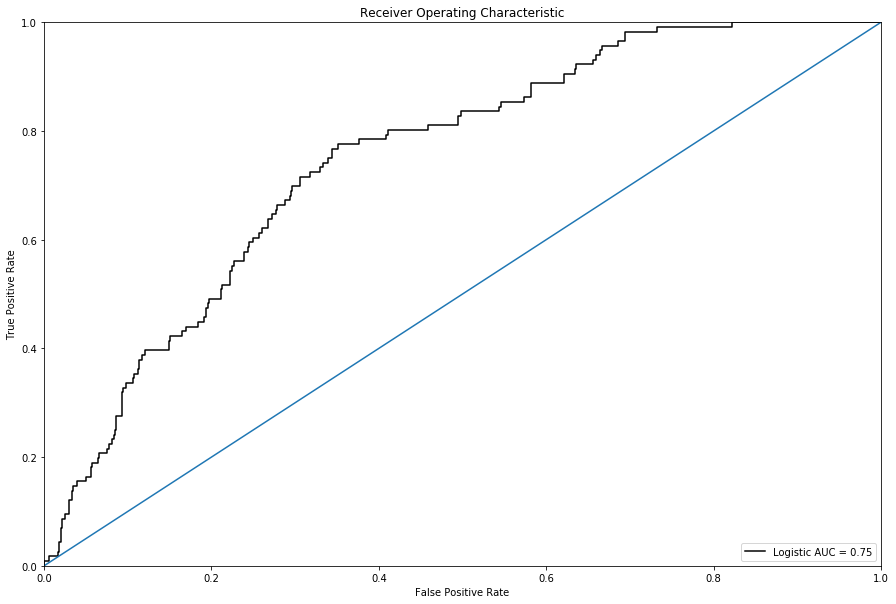

In [233]:
import sklearn.metrics as metrics

mlp_probs = MLP_model2.predict_proba(test_input)[:,1]
mlp_fpr, mlp_tpr, mlp_threshold = metrics.roc_curve(test_label, mlp_probs)
mlp_auc = metrics.auc(mlp_fpr, mlp_tpr)

mplt.figure(figsize=(15, 10))
mplt.title('Receiver Operating Characteristic')
mplt.plot(mlp_fpr, mlp_tpr, 'k', label = 'Logistic AUC = %0.2f' % mlp_auc)
mplt.legend(loc = 'lower right')
mplt.plot([0, 1], [0, 1],'-')
mplt.xlim([0, 1])
mplt.ylim([0, 1])
mplt.ylabel('True Positive Rate')
mplt.xlabel('False Positive Rate')
mplt.savefig('roccurveMLP.png')
mplt.show()

[[481 251]
 [ 29  87]]


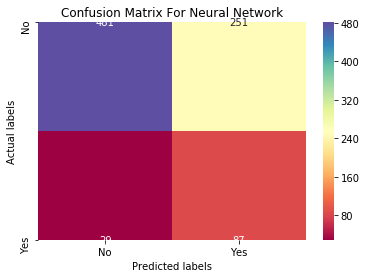

In [235]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(mlp_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Neural Network')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMNN.png')
print(mlp_cm)